# **Modeling**

# Part 1: Preparing the Data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
os.getcwd()

'/workspace'

In [4]:
data = pd.read_csv('Crime_Clean2.csv')

In [5]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Bachelors %,Public Transportation %,Unemployed %,Male %,Female %,White %,Black %,Asian %,American Indian %,Other Race %
0,50,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.270167,0.049515,0.029053,0.525494,0.474506,0.803846,0.101099,0.087912,0.0,0.007143
1,51,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.270167,0.049515,0.029053,0.525494,0.474506,0.803846,0.101099,0.087912,0.0,0.007143
2,52,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.270167,0.049515,0.029053,0.525494,0.474506,0.803846,0.101099,0.087912,0.0,0.007143
3,53,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.270167,0.049515,0.029053,0.525494,0.474506,0.803846,0.101099,0.087912,0.0,0.007143
4,54,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.270167,0.049515,0.029053,0.525494,0.474506,0.803846,0.101099,0.087912,0.0,0.007143


In [6]:
len(data)

235368

In [7]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [8]:
## Drop City column

data = data.drop('City',1)

In [9]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [10]:
data.isnull().sum()

Unnamed: 0                 0
Incident ID                0
Police District Name       0
Block                      0
Crime Name1                0
Crime Name2                0
Crime Name3                0
Victims                    0
Place                      0
Pop                        0
Income                     0
Age                        0
Educational Attainment     0
Bachelors                  0
High School                0
Means of Transportation    0
Public Transportation      0
Total Laborforce           0
Total Unemployed           0
Start_Date_Time            0
Location                   0
Longitude                  0
Latitude                   0
Male                       0
Female                     0
Black                      0
White                      0
Asian                      0
American Indian            0
Other Race                 0
High School %              0
Bachelors %                0
Public Transportation %    0
Unemployed %               0
Male %        

In [11]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']

In [12]:
len(data)

187827

In [13]:
## Drop other unnecessary columns

data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed','Longitude','Latitude', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian'],1)

In [14]:
data['Crime Name3'].value_counts().loc[lambda x: x > 1000]

LARCENY - FROM AUTO                           20699
DRUGS - MARIJUANA - POSSESS                   14408
ASSAULT - 2ND DEGREE                          12724
LARCENY - SHOPLIFTING                         12145
DRIVING UNDER THE INFLUENCE LIQUOR            11747
LARCENY (DESCRIBE OFFENSE)                     9687
DAMAGE PROPERTY - PRIVATE                      9123
LARCENY - FROM BLDG                            8310
IDENTITY THEFT                                 4896
LIQUOR - POSSESS                               4411
PUBLIC PEACE - DISORDERLY CONDUCT              4318
AUTO THEFT - VEHICLE THEFT                     4149
LARCENY - AUTO PARTS                           4056
TRESPASSING                                    3378
FRAUD - ILLEGAL USE CREDIT CARDS               3358
DAMAGE PROPERTY (DESCRIBE OFFENSE)             3146
JUVENILE - RUNAWAY                             2817
ASSAULT - SIMPLE                               2792
BURGLARY - FORCED ENTRY-RESIDENTIAL            2710
FRAUD (DESCR

In [15]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Male', 'Female', 'Black', 'White',
       'Asian', 'American Indian', 'Other Race', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'Male %',
       'Female %', 'White %', 'Black %', 'Asian %', 'American Indian %',
       'Other Race %'],
      dtype='object')

In [16]:
data.shape

(187827, 30)

In [17]:
data['Place'].value_counts().loc[lambda x: x > 1000]

Street - In vehicle                   27251
Residence - Single Family             14706
Residence - Apartment/Condo           14260
Street - Residential                  13815
Other/Unknown                         11922
Parking Lot - Residential             11026
Residence - Driveway                   8425
Parking Lot - Commercial               7536
Residence -Townhouse/Duplex            6935
Retail - Department/Discount Store     5918
Street - Commercial                    5208
School/College                         4215
Retail - Mall                          4067
Restaurant                             3883
Grocery/Supermarket                    3748
Street - Other                         3503
Retail - Other                         2798
Residence - Other                      2535
Convenience Store                      2267
Residence - Yard                       2140
Commercial - Office Building           2024
Parking Garage - Residential           1690
Street - Bus Stop               

In [18]:
data['Crime Name1'].value_counts()

Crime Against Property    103669
Crime Against Society      59437
Crime Against Person       21904
Not a Crime                 2817
Name: Crime Name1, dtype: int64

In [19]:
data= data[data['Crime Name1'] != 'Not a Crime']

In [20]:
data.shape

(185010, 30)

In [21]:
## Create new, less general crime categories based on EDA rather than NIBRS crime classifications

import re

pattern1 = r'.*\s*(ASSAULT|RAPE|BLDG|OBSTRUCT GOVT|SEX|FAMILY|FORCED|COMMUNICATION|TRESPASSING|LARCENY \(DESCRIBE OFFENSE\))\.*'
pattern2 = r'.*\s*(DRUGS|INFLUENCE|LIQUOR|OBSTRUCT POLICE|WEAPON)\.*'
pattern3 = r'.*\s*(FRAUD|IDENTITY|FORGERY|EMBEZZLE)\.*'
pattern4 = r'.*\s*(DAMAGE PROPERTY|AUTO|DISORDERLY CONDUCT|ROBBERY)\.*'
pattern5 = r'.*\s*(SHOPLIFTING|MALLS|POCKET|PURSE|COUNTERFEITING)\.*'

for i, rowseries in data.iterrows():
    if re.match(pattern1, data.at[i,'Crime Name3']):
        data.at[i, 'Crime Type'] = 'Assault/Burglary/Residential Theft'
    elif re.match(pattern2, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Drugs/DUI/Weapon'
    elif re.match(pattern3, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Fraud'
    elif re.match(pattern4, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Auto Theft/Property Damage/Robbery/Disorderly Conduct'
    elif re.match(pattern5, data.at[i,'Crime Name3']):
        data.at[i,'Crime Type'] = 'Theft from Store/Pocket Picking/Counterfeit'
    else:
        data.at[i,'Crime Type'] = 'All Other Offenses'


In [22]:
data['Crime Type'].value_counts()

Assault/Burglary/Residential Theft                       53424
Auto Theft/Property Damage/Robbery/Disorderly Conduct    50067
Drugs/DUI/Weapon                                         44788
Fraud                                                    16871
Theft from Store/Pocket Picking/Counterfeit              13932
All Other Offenses                                        5928
Name: Crime Type, dtype: int64

In [23]:
rand = data[['Crime Name3','Crime Type']]
rand = data[data['Crime Type'] == 'All Other Offenses']
rand['Crime Name3'].value_counts().loc[lambda x: x > 100]

ALL OTHER OFFENSES                                   1339
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)     740
LARCENY - POSTAL                                      499
LARCENY - FROM YARDS                                  462
BURGLARY (DESCRIBE OFFENSE)                           390
FUGITIVE FROM JUSTICE (OUT OF STATE)                  279
FUGITIVE FROM MD JURISDICTION                         259
STOLEN VEHICLE (DESCRIBE OFFENSE)                     218
PUBLIC PEACE (DESCRIBE OFFENSE)                       174
ARSON - BURNING OF - (IDENTIFY OBJECT)                104
Name: Crime Name3, dtype: int64

In [24]:
data = data[data['Crime Type'] != 'All Other Offenses']
data['Crime Type'].value_counts()

Assault/Burglary/Residential Theft                       53424
Auto Theft/Property Damage/Robbery/Disorderly Conduct    50067
Drugs/DUI/Weapon                                         44788
Fraud                                                    16871
Theft from Store/Pocket Picking/Counterfeit              13932
Name: Crime Type, dtype: int64

In [25]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [26]:
classes_spec = data['Crime Type'].value_counts()

top_classes_spec = list(classes_spec.index.values)

top_classes_spec = sorted(top_classes_spec)
top_classes_spec

['Assault/Burglary/Residential Theft',
 'Auto Theft/Property Damage/Robbery/Disorderly Conduct',
 'Drugs/DUI/Weapon',
 'Fraud',
 'Theft from Store/Pocket Picking/Counterfeit']

In [27]:
num_classes_gen = len(np.unique(top_classes_gen))
num_classes_spec = len(np.unique(top_classes_spec))

In [28]:
## Create 3 different subsets of places: 1. places with over 1000 crimes 2. places with over 3000 crimes 3. places with over 5000 crimes
## Create 3 different datasets based on subsetting the dataset according to each place subset

places1 = data['Place'].value_counts().loc[lambda x: x > 0]
places2 = data['Place'].value_counts().loc[lambda x: x > 3000]
places3 = data['Place'].value_counts().loc[lambda x: x > 5000]


top_places1 = list(places1.index.values)
top_places2 = list(places2.index.values)
top_places3 = list(places3.index.values)

data1 = data[data['Place'].isin(top_places1)]
data2 = data[data['Place'].isin(top_places2)]
data3 = data[data['Place'].isin(top_places3)]

In [29]:
data1['Crime Name1'].value_counts()

Crime Against Property    101245
Crime Against Society      56056
Crime Against Person       21781
Name: Crime Name1, dtype: int64

In [30]:
data2['Crime Name1'].value_counts()

Crime Against Property    75929
Crime Against Society     46339
Crime Against Person      17480
Name: Crime Name1, dtype: int64

In [31]:
data3['Crime Name1'].value_counts()

Crime Against Property    65523
Crime Against Society     40471
Crime Against Person      15011
Name: Crime Name1, dtype: int64

In [32]:
data1['Crime Type'].value_counts()

Assault/Burglary/Residential Theft                       53424
Auto Theft/Property Damage/Robbery/Disorderly Conduct    50067
Drugs/DUI/Weapon                                         44788
Fraud                                                    16871
Theft from Store/Pocket Picking/Counterfeit              13932
Name: Crime Type, dtype: int64

In [33]:
data2['Crime Type'].value_counts()

Auto Theft/Property Damage/Robbery/Disorderly Conduct    40521
Drugs/DUI/Weapon                                         38825
Assault/Burglary/Residential Theft                       37344
Fraud                                                    13917
Theft from Store/Pocket Picking/Counterfeit               9141
Name: Crime Type, dtype: int64

In [34]:
data3['Crime Type'].value_counts()

Auto Theft/Property Damage/Robbery/Disorderly Conduct    37948
Drugs/DUI/Weapon                                         34849
Assault/Burglary/Residential Theft                       30279
Fraud                                                    13457
Theft from Store/Pocket Picking/Counterfeit               4472
Name: Crime Type, dtype: int64

In [35]:
## One-hot encode Place and Police District Variables

data1 = pd.get_dummies(data1, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])
data2 = pd.get_dummies(data2, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])
data3 = pd.get_dummies(data3, prefix = ['Place','Police District Name'], columns = ['Place','Police District Name'])

In [36]:
data1.shape

(179082, 121)

In [37]:
## Get features for each dataset

features1 = data1[data1.columns[~data1.columns.isin(['Incident ID','Block','Crime Name3','Crime Name1','Crime Type','Location','Start_Date_Time'])]]
features2 = data2[data2.columns[~data2.columns.isin(['Incident ID','Block','Crime Name3','Crime Name1','Crime Type','Location','Start_Date_Time'])]]
features3 = data3[data3.columns[~data3.columns.isin(['Incident ID','Block','Crime Name3','Crime Name1','Crime Type','Location','Start_Date_Time'])]]


In [38]:
## Label encode the target variable for each dataset

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

labels_gen1 = le.fit_transform(data1['Crime Name1'])
labels_spec1 = le.fit_transform(data1['Crime Type'])

labels_gen2 = le.fit_transform(data2['Crime Name1'])
labels_spec2 = le.fit_transform(data2['Crime Type'])

labels_gen3 = le.fit_transform(data3['Crime Name1'])
labels_spec3 = le.fit_transform(data3['Crime Type'])


In [39]:
labels_gen1[:10]

array([0, 1, 1, 1, 1, 1, 0, 2, 2, 2])

In [41]:
## Create training and testing data for each dataset

from sklearn.model_selection import train_test_split

train_gen1, test_gen1, train_labels_gen1, test_labels_gen1 = train_test_split(features1,labels_gen1,test_size=0.25,random_state=4)

train_gen2, test_gen2, train_labels_gen2, test_labels_gen2 = train_test_split(features2,labels_gen2,test_size=0.25,random_state=4)

train_gen3, test_gen3, train_labels_gen3, test_labels_gen3 = train_test_split(features3,labels_gen3,test_size=0.25,random_state=4)



train_spec1, test_spec1, train_labels_spec1, test_labels_spec1 = train_test_split(features1,labels_spec1,test_size=0.25,random_state=4)

train_spec2, test_spec2, train_labels_spec2, test_labels_spec2 = train_test_split(features2,labels_spec2,test_size=0.25,random_state=4)

train_spec3, test_spec3, train_labels_spec3, test_labels_spec3 = train_test_split(features3,labels_spec3,test_size=0.25,random_state=4)


In [42]:
## One-hot encode label-encoded data for Classification metrics

one_hot = preprocessing.OneHotEncoder()
one_hot_labels_gen1 = one_hot.fit_transform(test_labels_gen1.reshape(-1,1))
one_hot_labels_gen1 = one_hot_labels_gen1.toarray()

one_hot_labels_gen2 = one_hot.fit_transform(test_labels_gen2.reshape(-1,1))
one_hot_labels_gen2 = one_hot_labels_gen2.toarray()

one_hot_labels_gen3 = one_hot.fit_transform(test_labels_gen3.reshape(-1,1))
one_hot_labels_gen3 = one_hot_labels_gen3.toarray()

one_hot_labels_spec1 = one_hot.fit_transform(test_labels_spec1.reshape(-1,1))
one_hot_labels_spec1 = one_hot_labels_spec1.toarray()

one_hot_labels_spec2 = one_hot.fit_transform(test_labels_spec2.reshape(-1,1))
one_hot_labels_spec2 = one_hot_labels_spec2.toarray()

one_hot_labels_spec3 = one_hot.fit_transform(test_labels_spec3.reshape(-1,1))
one_hot_labels_spec3 = one_hot_labels_spec3.toarray()


In [43]:
one_hot_labels_gen1[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
## Baseline/Dummy Model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(X, y, model):
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [45]:
## Function for Determining Precision

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

def getPrecision(top_classes, test_labels, predictions):

    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(top_classes)):
        precision[i], recall[i], _ = precision_recall_curve(test_labels[:, i],
                                                        predictions[:, i])
        average_precision[i] = average_precision_score(test_labels[:, i], predictions[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(test_labels.ravel(),
        predictions.ravel())
    average_precision["micro"] = average_precision_score(test_labels, predictions,
                                                     average="micro")
    print('Average precision score, micro-averaged over all classes: {0:0.2f}'
          .format(average_precision["micro"]))

In [46]:
## Function for Determining ROC AUC

from sklearn.metrics import roc_auc_score


def getAUC(test_labels, predictions):

    macro_roc_auc_ovo = roc_auc_score(test_labels, predictions, multi_class="ovo",
                                  average="macro")
    weighted_roc_auc_ovo = roc_auc_score(test_labels, predictions, multi_class="ovo",
                                     average="weighted")
    macro_roc_auc_ovr = roc_auc_score(test_labels, predictions, multi_class="ovr",
                                  average="macro")
    weighted_roc_auc_ovr = roc_auc_score(test_labels, predictions, multi_class="ovr",
                                     average="weighted")
    print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [188]:
def Precision(top_classes, test_labels, predictions):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(top_classes)):
        precision[i], recall[i], _ = precision_recall_curve(test_labels[:, i],
                                                        predictions[:, i])
        average_precision[i] = average_precision_score(test_labels[:, i], predictions[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(test_labels.ravel(),
        predictions.ravel())
    average_precision["micro"] = average_precision_score(test_labels, predictions,
                                                     average="micro")
    return precision, recall, average_precision

# Part 2: Demonstrating the Problem of Class Imbalance in the Place Predictor Variable

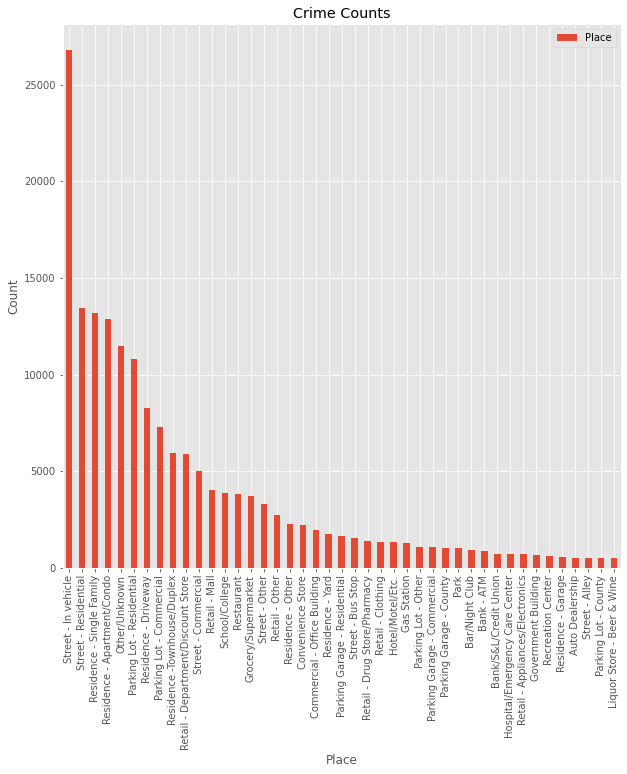

In [47]:
places_data = pd.DataFrame(data['Place'].value_counts().loc[lambda x: x > 500])
places_data.plot(kind='bar',title = 'Crime Counts')
plt.xlabel('Place')
plt.ylabel('Count')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Predicting Crimes Against Society, Persons, and Property

In [48]:
## Baseline Random Forest Model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,
                               random_state=4,
                               max_features='sqrt',
                               n_jobs=-1, verbose=1)

### Part 2A: All Places

In [49]:
model.fit(train_gen1, train_labels_gen1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [51]:
from sklearn.metrics import accuracy_score

predictions_gen1 = model.predict(test_gen1)
accuracy_score(test_labels_gen1, predictions_gen1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.7459292845815372

In [52]:
predictions_gen1 = model.predict_proba(test_gen1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [53]:
predictions_gen1[:,0]

array([0.        , 0.13878008, 0.        , ..., 0.06415204, 0.03676522,
       0.01164726])

In [54]:
one_hot_labels_gen1[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
getPrecision(top_classes_gen,one_hot_labels_gen1, predictions_gen1)

Average precision score, micro-averaged over all classes: 0.81


In [56]:
getAUC(one_hot_labels_gen1, predictions_gen1)

One-vs-One ROC AUC scores:
0.839624 (macro),
0.851882 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.839624 (macro),
0.851882 (weighted by prevalence)


### Part 2B: Places with 3000+ Crimes

In [57]:
model.fit(train_gen2, train_labels_gen2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [58]:
predictions_gen2 = model.predict(test_gen2)
accuracy_score(test_labels_gen2, predictions_gen2)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.7571342702578928

In [59]:
predictions_gen2 = model.predict_proba(test_gen2)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [60]:
getPrecision(top_classes_gen,one_hot_labels_gen2, predictions_gen2)

Average precision score, micro-averaged over all classes: 0.83


In [61]:
getAUC(one_hot_labels_gen2, predictions_gen2)

One-vs-One ROC AUC scores:
0.855748 (macro),
0.866226 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.855748 (macro),
0.866226 (weighted by prevalence)


### Part 2C: Places with 5000+ Crimes

In [62]:
model.fit(train_gen3, train_labels_gen3)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [63]:
predictions_gen3 = model.predict(test_gen3)
accuracy_score(test_labels_gen3, predictions_gen3)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.7700317334391115

In [64]:
predictions_gen3 = model.predict_proba(test_gen3)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [65]:
getPrecision(top_classes_gen,one_hot_labels_gen3, predictions_gen3)

Average precision score, micro-averaged over all classes: 0.84


In [66]:
getAUC(one_hot_labels_gen3, predictions_gen3)

One-vs-One ROC AUC scores:
0.866604 (macro),
0.877909 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.866604 (macro),
0.877909 (weighted by prevalence)


## Predicting More Specific Crime Types

### Part 2A: All Places

In [67]:
model.fit(train_spec1, train_labels_spec1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [68]:
predictions_spec1 = model.predict(test_spec1)
accuracy_score(test_labels_spec1, predictions_spec1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.6922784838399857

In [69]:
predictions_spec1 = model.predict_proba(test_spec1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [70]:
getPrecision(top_classes_spec,one_hot_labels_spec1, predictions_spec1)

Average precision score, micro-averaged over all classes: 0.73


In [71]:
getAUC(one_hot_labels_spec1, predictions_spec1)

One-vs-One ROC AUC scores:
0.890883 (macro),
0.872262 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.890883 (macro),
0.872262 (weighted by prevalence)


### Part 2B: Places with 3000+ Crimes

In [72]:
model.fit(train_spec2, train_labels_spec2)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [73]:
predictions_spec2 = model.predict(test_spec2)
accuracy_score(test_labels_spec2, predictions_spec2)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.7287689269256089

In [74]:
predictions_spec2 = model.predict_proba(test_spec2)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [75]:
getPrecision(top_classes_spec,one_hot_labels_spec2, predictions_spec2)

Average precision score, micro-averaged over all classes: 0.77


In [76]:
getAUC(one_hot_labels_spec2, predictions_spec2)

One-vs-One ROC AUC scores:
0.905675 (macro),
0.890453 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.905675 (macro),
0.890453 (weighted by prevalence)


### Part 2C: Places with 5000+ Crimes

In [77]:
model.fit(train_spec3, train_labels_spec3)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=4,
                       verbose=1)

In [78]:
predictions_spec3 = model.predict(test_spec3)
accuracy_score(test_labels_spec3, predictions_spec3)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


0.7505288906518577

In [79]:
predictions_spec3 = model.predict_proba(test_spec3)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [80]:
getPrecision(top_classes_spec, one_hot_labels_spec3, predictions_spec3)

Average precision score, micro-averaged over all classes: 0.79


In [81]:
getAUC(one_hot_labels_spec3, predictions_spec3)

One-vs-One ROC AUC scores:
0.911953 (macro),
0.897935 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.911953 (macro),
0.897935 (weighted by prevalence)


# Part 3: Addressing the Problem of an Imbalanced Predictor Variable

## Part 3A: Is there Class Imbalance in the Target Variable and, if so, does Balancing the Classes Improve Classification Accuracy?

### Predicting Crimes Against Society, Persons, and Property

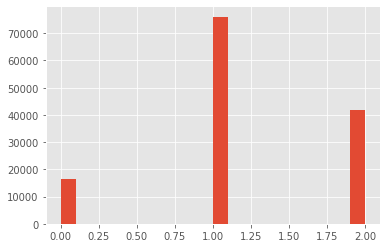

In [82]:
## Plot Target Variables Class Distribution

plt.hist(train_labels_gen1, bins=20)
plt.show()

In [83]:
## Correct for Class Imbalance using SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(random_state=4)

X_sm, y_sm = smote.fit_resample(train_gen1, train_labels_gen1)

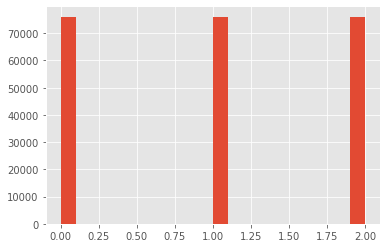

In [84]:
plt.hist(y_sm, bins=20)
plt.show()

In [85]:
## Correct for Class Imbalance by Oversampling Minority Class

smote2 = SMOTE('minority')

X_sm2, y_sm2 = smote2.fit_resample(train_gen1, train_labels_gen1)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=minority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


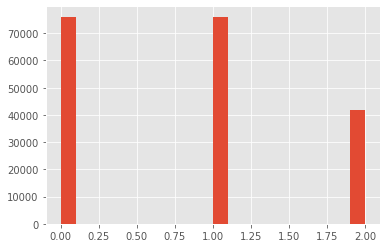

In [86]:
plt.hist(y_sm2, bins=20)
plt.show()

In [87]:
## Correct for Class Imbalance by Undersampling from Majority Class

under = RandomUnderSampler('majority')

X_u, Y_u = under.fit_resample(train_gen1, train_labels_gen1)

/usr/local/lib/python3.6/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


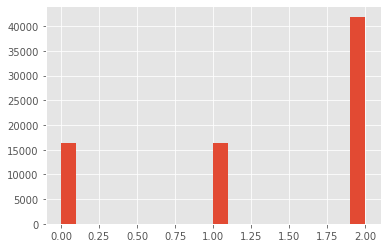

In [88]:
plt.hist(Y_u, bins=20)
plt.show()

In [89]:
model.fit(X_sm,y_sm)

predictions = model.predict(test_gen1)

print('Accuracy of SMOTE Balanced Data: ' + str(accuracy_score(test_labels_gen1, predictions)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.


Accuracy of SMOTE Balanced Data: 0.6917424225503116


[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [90]:
predictions = model.predict_proba(test_gen1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [91]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions)

Average precision score, micro-averaged over all classes: 0.77


In [92]:
getAUC(one_hot_labels_gen1, predictions)

One-vs-One ROC AUC scores:
0.832516 (macro),
0.842910 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.832516 (macro),
0.842910 (weighted by prevalence)


In [93]:
model.fit(X_sm2,y_sm2)

predictions = model.predict(test_gen1)

print('Accuracy of Minority Oversampled Data: ' + str(accuracy_score(test_labels_gen1, predictions)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.


Accuracy of Minority Oversampled Data: 0.688057001183802


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [94]:
predictions = model.predict_proba(test_gen1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [95]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions)

Average precision score, micro-averaged over all classes: 0.76


In [96]:
getAUC(one_hot_labels_gen1, predictions)

One-vs-One ROC AUC scores:
0.830369 (macro),
0.840595 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.830369 (macro),
0.840595 (weighted by prevalence)


In [97]:
model.fit(X_u, Y_u)

predictions = model.predict(test_gen1)

print('Accuracy of Majority Undersampled Data: ' + str(accuracy_score(test_labels_gen1, predictions)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy of Majority Undersampled Data: 0.6311674968171361


In [98]:
predictions = model.predict_proba(test_gen1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [99]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions)

Average precision score, micro-averaged over all classes: 0.70


In [100]:
getAUC(one_hot_labels_gen1, predictions)

One-vs-One ROC AUC scores:
0.827697 (macro),
0.836093 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.827697 (macro),
0.836093 (weighted by prevalence)


### Predicting More Specific Crimes

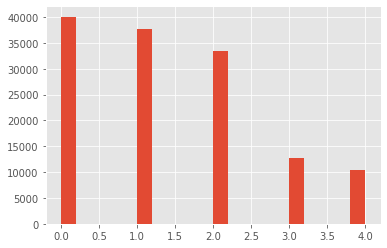

In [101]:
## Plot Target Variable Class Distribution
plt.hist(train_labels_spec1, bins=20)
plt.show()

In [102]:
## Correct for Class Imbalance using SMOTE

X_sm, y_sm = smote.fit_resample(train_spec1, train_labels_spec1)

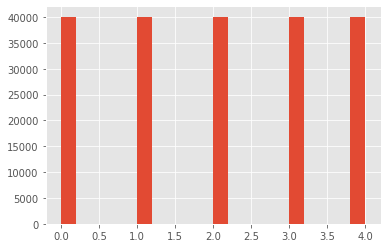

In [103]:
plt.hist(y_sm, bins=20)
plt.show()

In [104]:
## Correct for Class Imbalance by Oversampling Minority Class

X_sm2, y_sm2 = smote2.fit_resample(train_spec1, train_labels_spec1)

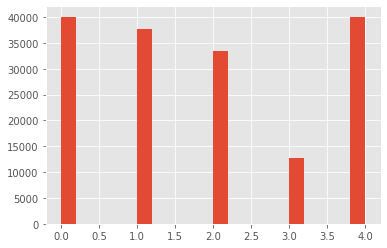

In [105]:
plt.hist(y_sm2, bins=20)
plt.show()

In [106]:
## Correct for Class Imbalance by Undersampling from Majority Class

X_u, Y_u = under.fit_resample(train_spec1, train_labels_spec1)

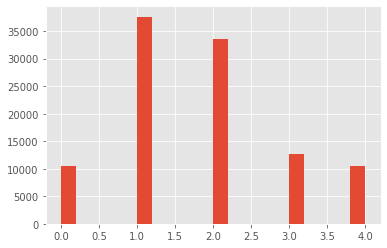

In [107]:
plt.hist(Y_u, bins=20)
plt.show()

In [108]:
model.fit(X_sm,y_sm)

predictions = model.predict(test_spec1)

print('Accuracy of SMOTE Balanced Data: ' + str(accuracy_score(test_labels_spec1, predictions)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


Accuracy of SMOTE Balanced Data: 0.6717964753970204


In [109]:
predictions = model.predict_proba(test_spec1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [110]:
getPrecision(top_classes_spec, one_hot_labels_spec1, predictions)

Average precision score, micro-averaged over all classes: 0.71


In [111]:
getAUC(one_hot_labels_spec1, predictions)

One-vs-One ROC AUC scores:
0.884992 (macro),
0.864502 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.884992 (macro),
0.864502 (weighted by prevalence)


In [112]:
model.fit(X_sm2,y_sm2)

predictions = model.predict(test_spec1)

print('Accuracy of Minority Oversampled Data: ' + str(accuracy_score(test_labels_spec1, predictions)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.


Accuracy of Minority Oversampled Data: 0.685689397154408


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [113]:
predictions = model.predict_proba(test_spec1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [114]:
getPrecision(top_classes_spec, one_hot_labels_spec1, predictions)

Average precision score, micro-averaged over all classes: 0.71


In [115]:
getAUC(one_hot_labels_spec1, predictions)

One-vs-One ROC AUC scores:
0.885241 (macro),
0.865623 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.885241 (macro),
0.865623 (weighted by prevalence)


In [116]:
model.fit(X_u, Y_u)

predictions = model.predict(test_spec1)

print('Accuracy of Majority Undersampled Data: ' + str(accuracy_score(test_labels_spec1, predictions)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.


Accuracy of Majority Undersampled Data: 0.6250921355341628


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [117]:
predictions = model.predict_proba(test_spec1)

[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 100 out of 100 | elapsed:    0.1s finished


In [118]:
getPrecision(top_classes_spec, one_hot_labels_spec1, predictions)

Average precision score, micro-averaged over all classes: 0.68


In [119]:
getAUC(one_hot_labels_spec1, predictions)

One-vs-One ROC AUC scores:
0.884151 (macro),
0.861724 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.884151 (macro),
0.861724 (weighted by prevalence)


## Part 3B: Can we Achieve Better Results using Hyperparameter-Tuned and Cross-Validated Random Forest and Gradient Boosted Machine Models?

### **Predicting Crimes Against Persons, Society, Property**

### Baseline Model Accuracy

In [120]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

scores = evaluate_model(test_gen1, test_labels_gen1, dummy)
print('Mean Accuracy:' + str(np.mean(scores)))

Mean Accuracy:0.5622389514394996


### Hyperparameter-Tuned Random Forest Model

In [317]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'max_features': ['auto','sqrt', None] + list(np.arange(0.5,1,0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10],
    'bootstrap': [True,False]
}

estimator = RandomForestClassifier(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid, n_jobs= -1,cv=3,
                       n_iter = 5, verbose = 1, random_state=4)

rs.fit(train_gen1, train_labels_gen1)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                            

In [318]:
print(rs.best_params_)

{'n_estimators': 110, 'min_samples_split': 10, 'max_leaf_nodes': 37, 'max_features': None, 'max_depth': 19, 'bootstrap': False}


In [321]:
from sklearn.multiclass import OneVsRestClassifier

best_model_gen_rf = rs.best_estimator_

ovr_best_model_gen_rf = OneVsRestClassifier(best_model_gen_rf)

In [322]:
ovr_best_model_gen_rf.fit(train_gen1,train_labels_gen1)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=19,
                                                     max_features=None,
                                                     max_leaf_nodes=37,
                                                     min_samples_split=10,
                                                     n_estimators=110,
                                                     random_state=4))

In [323]:
predictions_gen_rf = ovr_best_model_gen_rf.predict(test_gen1)
accuracy_score(test_labels_gen1, predictions_gen_rf)

0.7399209309597731

In [324]:
predictions_gen_rf = ovr_best_model_gen_rf.predict_proba(test_gen1)

In [325]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen_rf)

Average precision score, micro-averaged over all classes: 0.81


In [326]:
getAUC(one_hot_labels_gen1, predictions_gen_rf)

One-vs-One ROC AUC scores:
0.832964 (macro),
0.839847 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.832964 (macro),
0.839847 (weighted by prevalence)


### Hyperparameter-Tuned Xtreme Gradient Boosted Machine

In [214]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=4, eval_metric='mlogloss', use_label_encoder=False)

param_grid2 = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree' : [0.3, 0.5, 0.7]
}

rs2 = RandomizedSearchCV(xgb, param_grid2, cv=3,n_iter=5, random_state=4)

In [215]:
rs2.fit(train_gen1, train_labels_gen1)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                            

In [216]:
print(rs2.best_params_)

{'n_estimators': 60, 'max_depth': 14, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [217]:
best_model_gen_xgb = rs2.best_estimator_

In [218]:
best_model_gen_xgb.fit(train_gen1,train_labels_gen1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=14, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=28,
              num_parallel_tree=1, objective='multi:softprob', random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [219]:
predictions_gen_xgb = best_model_gen_xgb.predict(test_gen1)
accuracy_score(test_labels_gen1, predictions_gen_xgb)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


0.745035849098747

In [220]:
predictions_gen_xgb = best_model_gen_xgb.predict_proba(test_gen1)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [221]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen_rf)

Average precision score, micro-averaged over all classes: 0.79


In [222]:
getAUC(one_hot_labels_gen1, predictions_gen_rf)

One-vs-One ROC AUC scores:
0.824229 (macro),
0.829861 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.824229 (macro),
0.829861 (weighted by prevalence)


### Hyperparameter-Tuned Light Gradient Boosted Machine

In [223]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=4)

param_grid3 = {'n_estimators': np.linspace(0,200).astype(int),
              'max_depth': [None] + list(np.linspace(3,20).astype(int)),
              'learning_rate': [0.01, 0.1, 0.2],
               'bagging_fraction': [0.5,0.7,0.9],
               'feature_fraction': [0.5,0.7,0.9],
              }

rs3 = RandomizedSearchCV(lgbm, param_grid3, cv=3, n_iter=5)

In [224]:
rs3.fit(train_gen1, train_labels_gen1)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fractio

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=4), n_iter=5,
                   param_distributions={'bagging_fraction': [0.5, 0.7, 0.9],
                                        'feature_fraction': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'n_estimators': array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 102,
       106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 200])})

In [225]:
print(rs3.best_params_)

{'n_estimators': 183, 'max_depth': 13, 'learning_rate': 0.1, 'feature_fraction': 0.5, 'bagging_fraction': 0.9}


In [226]:
best_model_gen_lgbm = rs3.best_estimator_
best_model_gen_lgbm.fit(train_gen1, train_labels_gen1)

LGBMClassifier(bagging_fraction=0.9, feature_fraction=0.5, max_depth=13,
               n_estimators=183, random_state=4)

In [227]:
predictions_gen_lgbm = best_model_gen_lgbm.predict(test_gen1)

accuracy_score(test_labels_gen1, predictions_gen_lgbm)

0.7507538361886043

In [230]:
predictions_gen_lgbm = best_model_gen_lgbm.predict_proba(test_gen1)

In [231]:
getPrecision(top_classes_gen, one_hot_labels_gen1, predictions_gen_lgbm)

Average precision score, micro-averaged over all classes: 0.84


In [232]:
getAUC(one_hot_labels_gen1, predictions_gen_lgbm)

One-vs-One ROC AUC scores:
0.856390 (macro),
0.863841 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.856390 (macro),
0.863841 (weighted by prevalence)


### **Predicting More Specific Crimes**


### Baseline Model Accuracy

In [233]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')

scores = evaluate_model(test_spec1, test_labels_spec1, dummy)
print('Mean Accuracy:' + str(np.mean(scores)))

Mean Accuracy:0.2988318332036925


### Hyperparameter-Tuned Random Forest Model

In [234]:
rs.fit(train_spec1, train_labels_spec1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                      

In [235]:
print(rs.best_params_)

{'n_estimators': 110, 'min_samples_split': 10, 'max_leaf_nodes': 37, 'max_features': None, 'max_depth': 19, 'bootstrap': False}


In [332]:
best_model_spec_rf = rs.best_estimator_
ovr_best_model_spec_rf = OneVsRestClassifier(best_model_spec_rf)

In [333]:
ovr_best_model_spec_rf.fit(train_spec1,train_labels_spec1)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                     max_depth=19,
                                                     max_features=None,
                                                     max_leaf_nodes=37,
                                                     min_samples_split=10,
                                                     n_estimators=110,
                                                     random_state=4))

In [334]:
predictions_spec_rf = ovr_best_model_spec_rf.predict(test_spec1)
accuracy_score(test_labels_spec1, predictions_spec_rf)

0.6942663777891939

In [335]:
predictions_spec_rf = ovr_best_model_spec_rf.predict_proba(test_spec1)

In [336]:
getPrecision(top_classes_spec, one_hot_labels_spec1, predictions_spec_rf)

Average precision score, micro-averaged over all classes: 0.74


In [337]:
getAUC(one_hot_labels_spec1, predictions_spec_rf)

One-vs-One ROC AUC scores:
0.890648 (macro),
0.872746 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.890648 (macro),
0.872746 (weighted by prevalence)


### Hyperparameter-tuned Xtreme Gradient Boosted Machine

In [242]:
rs2.fit(train_spec1, train_labels_spec1)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                            

In [243]:
print(rs2.best_params_)

{'n_estimators': 126, 'max_depth': 17, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [244]:
best_model_spec_xgb = rs2.best_estimator_

In [245]:
best_model_spec_xgb.fit(train_spec1,train_labels_spec1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=17, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=126, n_jobs=28,
              num_parallel_tree=1, objective='multi:softprob', random_state=4,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [246]:
predictions_spec_xgb = best_model_spec_xgb.predict(test_spec1)
accuracy_score(test_labels_spec1, predictions_spec_xgb)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


0.7009001362489111

In [247]:
predictions_spec_xgb = best_model_spec_xgb.predict_proba(test_spec1)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


In [248]:
getPrecision(top_classes_spec, one_hot_labels_spec1, predictions_spec_xgb)

Average precision score, micro-averaged over all classes: 0.76


In [249]:
getAUC(one_hot_labels_spec1, predictions_spec_xgb)

One-vs-One ROC AUC scores:
0.900539 (macro),
0.882199 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.900539 (macro),
0.882199 (weighted by prevalence)


### Hyperparmeter-tuned Light Gradient Boosted Machine

In [250]:
rs3.fit(train_spec1, train_labels_spec1)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fractio

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=4), n_iter=5,
                   param_distributions={'bagging_fraction': [0.5, 0.7, 0.9],
                                        'feature_fraction': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'n_estimators': array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        53,  57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 102,
       106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 200])})

In [251]:
print(rs3.best_params_)

{'n_estimators': 61, 'max_depth': 10, 'learning_rate': 0.1, 'feature_fraction': 0.9, 'bagging_fraction': 0.7}


In [252]:
best_model_spec_lgbm = rs3.best_estimator_
best_model_spec_lgbm.fit(train_spec1, train_labels_spec1)

LGBMClassifier(bagging_fraction=0.7, feature_fraction=0.9, max_depth=10,
               n_estimators=61, random_state=4)

In [253]:
predictions_spec_lgbm = best_model_spec_lgbm.predict(test_spec1)

accuracy_score(test_labels_spec1, predictions_spec_lgbm)

0.7015032051997945

In [254]:
predictions_spec_lgbm = best_model_spec_lgbm.predict_proba(test_spec1)

In [255]:
getPrecision(top_classes_spec, one_hot_labels_spec1, predictions_spec_lgbm)

Average precision score, micro-averaged over all classes: 0.76


In [256]:
getAUC(one_hot_labels_spec1, predictions_spec_lgbm)

One-vs-One ROC AUC scores:
0.904386 (macro),
0.885440 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.904386 (macro),
0.885440 (weighted by prevalence)


## Part 4: Comparison and Analysis of Models: Which Categorizations can be Modeled More Accurately?

In [257]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [258]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

def getROCdata(top_classes,y_test,predictions_new):

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(top_classes)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions_new[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), predictions_new.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(top_classes))]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(len(top_classes)):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= len(top_classes)

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(len(top_classes)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC Curve')
    plt.legend(loc="lower right")
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()

In [259]:

def plotPrecisionRecall(top_classes, recall, precision, average_precision):
    # setup plot details
    colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

    plt.figure(figsize=(14, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')
    l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
    lines.append(l)
    labels.append('micro-average Precision-recall (area = {0:0.2f})'
                  ''.format(average_precision["micro"]))

    for i, color in zip(range(len(top_classes)), colors):
        l, = plt.plot(recall[i], precision[i], color=color, lw=2)
        lines.append(l)
        labels.append('Precision-recall for class:{0} (area = {1:0.2f})'
                      ''.format(i, average_precision[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve to multi-class')
    plt.legend(lines, labels, loc=(0, -.2), prop=dict(size=10))
    fig = plt.gcf()
    fig.set_size_inches(10,10)

    plt.show()

In [260]:
def plotPrecision(recall, precision, average_precision):

    plt.figure()
    plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')#,
                     #**step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
        .format(average_precision["micro"]))
    fig = plt.gcf()
    fig.set_size_inches(10,10)

In [261]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()

In [262]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.025):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

### Part 4A: Confusion Matrices, ROC Curves, and Precision-Recall Curves

### **Predicting Crimes Against Society, Persons, and Property**

In [263]:
importances1 = list(best_model_gen_rf.feature_importances_)
feature_list1 = list(features1.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [264]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

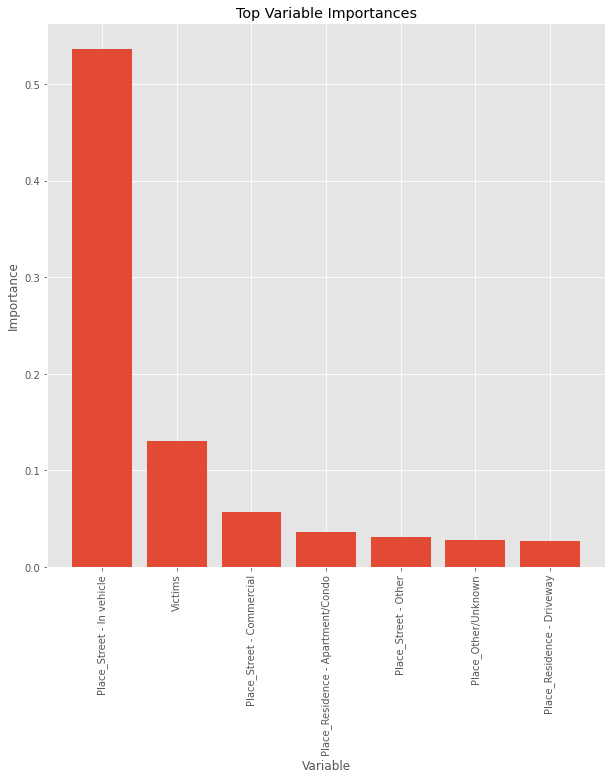

In [265]:
plotImportances(top_importances1, top_features_list1)

Confusion matrix, without normalization


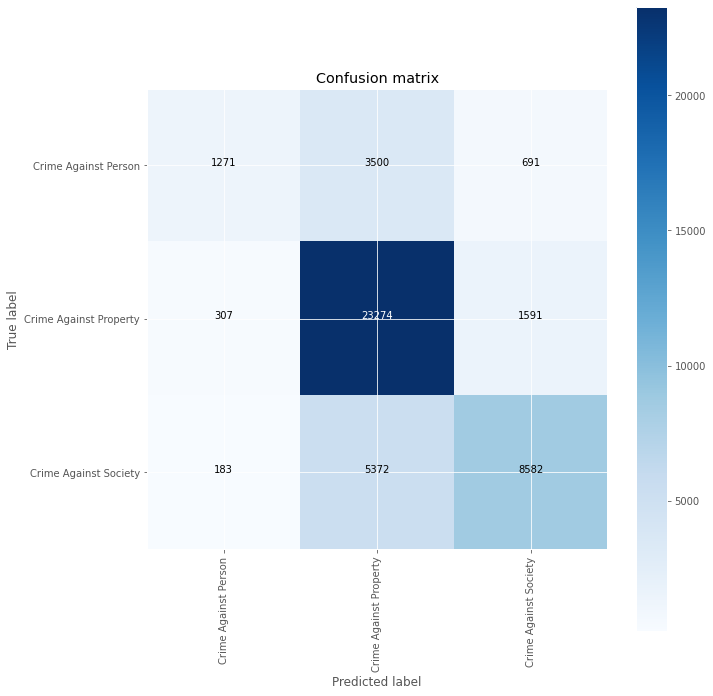

In [327]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_labels_gen1, np.argmax(predictions_gen_rf, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(top_classes_gen), normalize=False,
                      title='Confusion matrix')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


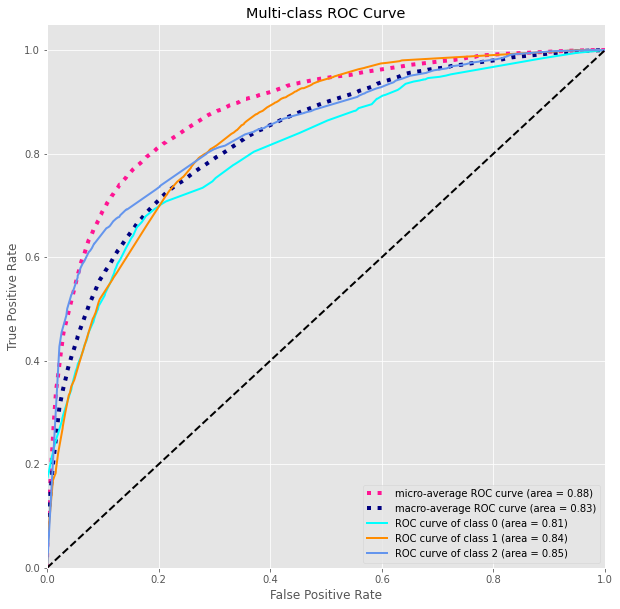

In [328]:
getROCdata(top_classes_gen,one_hot_labels_gen1,predictions_gen_rf)

In [329]:
precision, recall, average_precision = Precision(top_classes_gen, one_hot_labels_gen1, predictions_gen_rf)

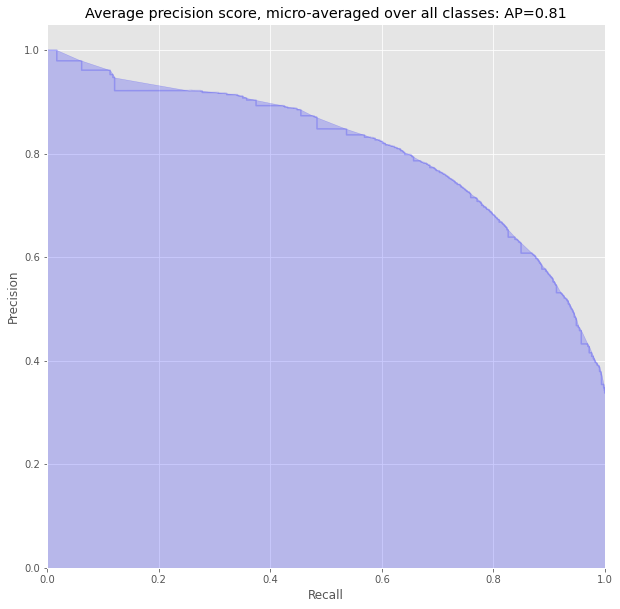

In [330]:
plotPrecision(recall,precision,average_precision)

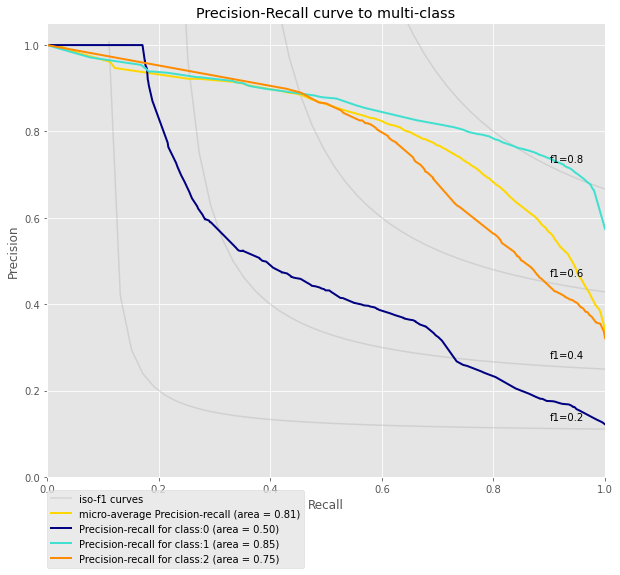

In [331]:
plotPrecisionRecall(top_classes_gen,recall,precision,average_precision)

In [271]:
importances2 = list(best_model_gen_xgb.feature_importances_)
feature_list2 = list(features1.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

In [272]:
top_features_list2, top_importances2 = getImportances(feature_importances2)

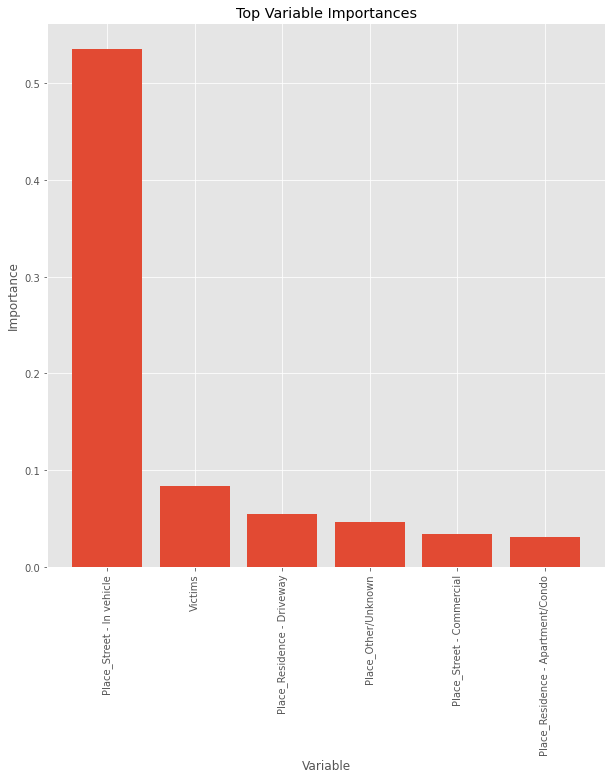

In [273]:
plotImportances(top_importances2, top_features_list2)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


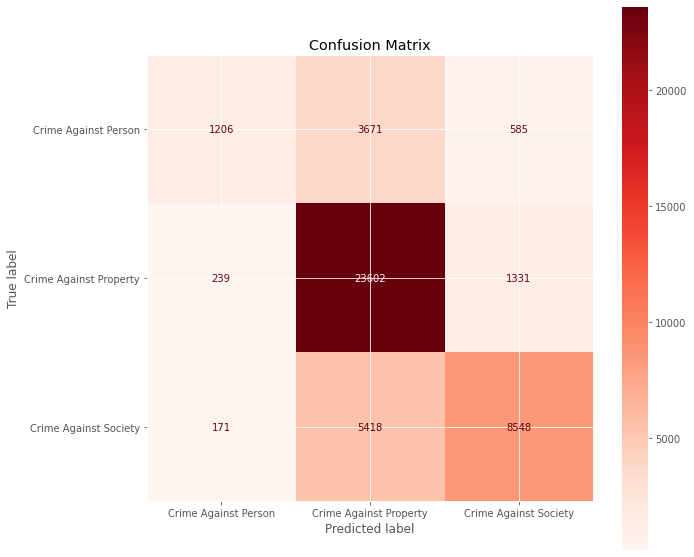

In [274]:
from sklearn.metrics import plot_confusion_matrix as plot_cm

plot_cm(best_model_gen_xgb, test_gen1, test_labels_gen1, display_labels=top_classes_gen, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


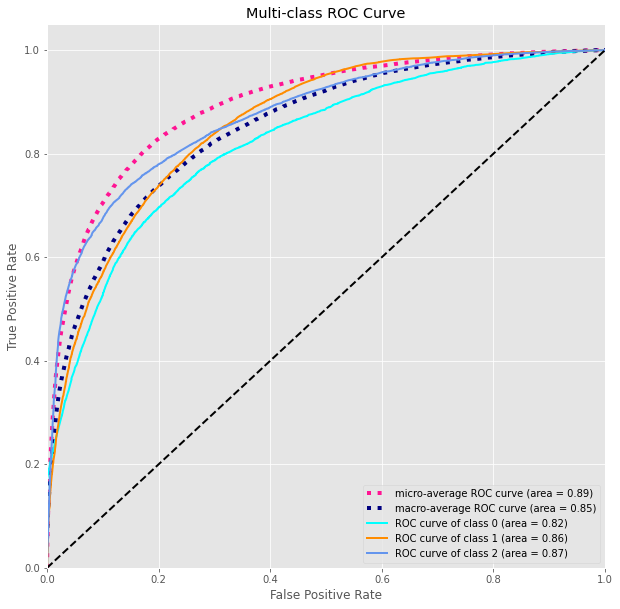

In [275]:
getROCdata(top_classes_gen,one_hot_labels_gen1,predictions_gen_xgb)

In [276]:
precision, recall, average_precision = Precision(top_classes_gen, one_hot_labels_gen1, predictions_gen_xgb)

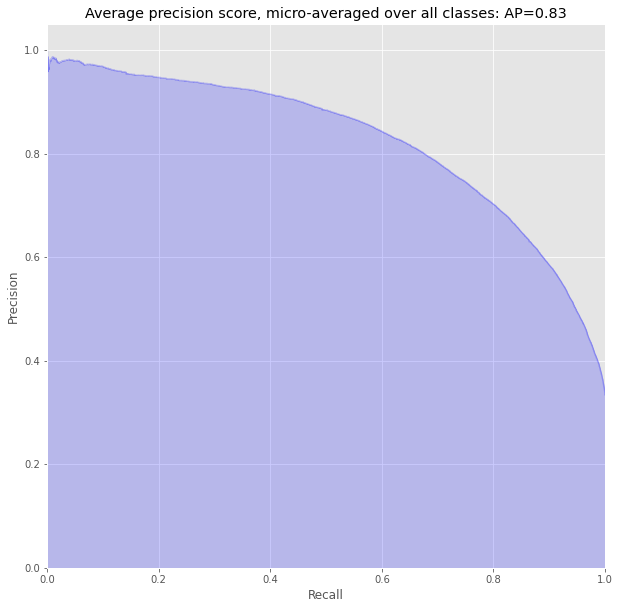

In [277]:
plotPrecision(recall, precision, average_precision)

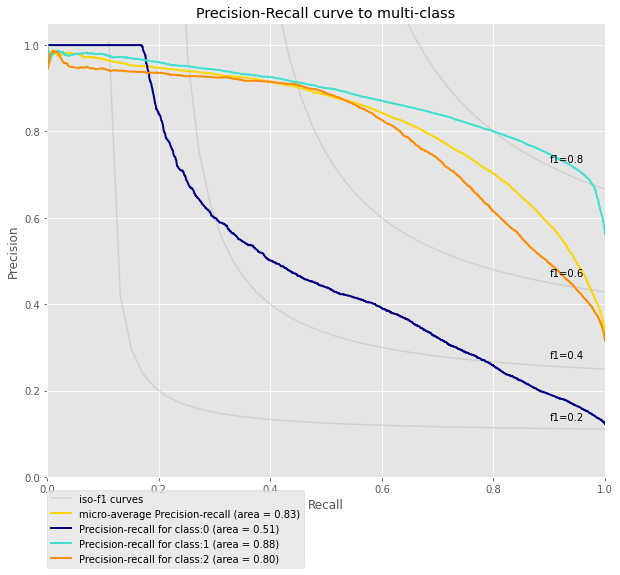

In [278]:
plotPrecisionRecall(top_classes_gen,recall,precision,average_precision)

In [279]:
lgbm_importances = best_model_gen_lgbm.feature_importances_/sum(best_model_gen_lgbm.feature_importances_)
importances3 = list(lgbm_importances)
feature_list3 = list(features1.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [280]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

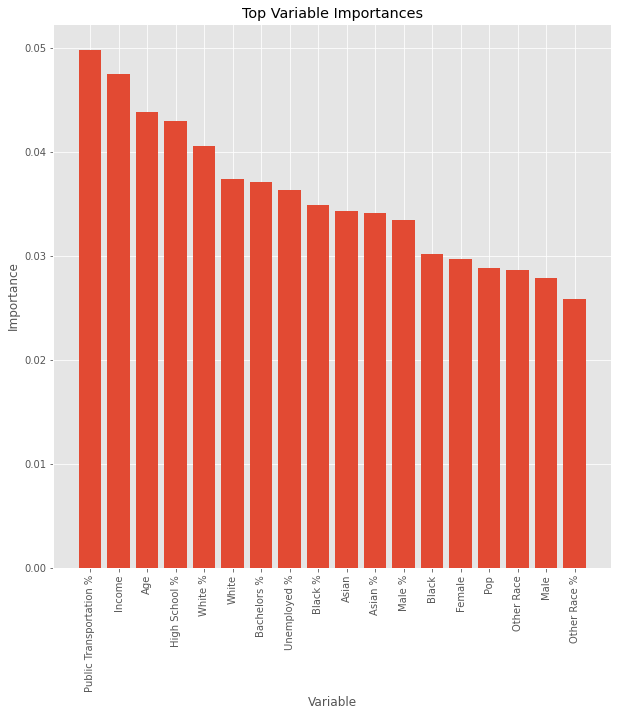

In [281]:
plotImportances(top_importances3, top_features_list3)

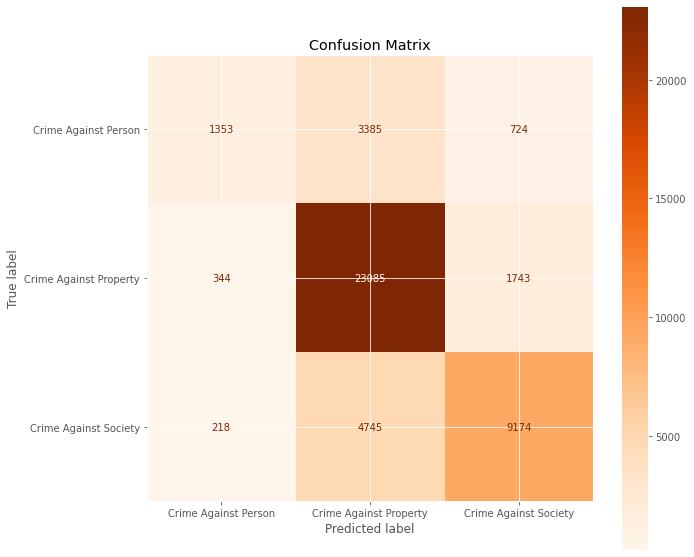

In [286]:
plot_cm(best_model_gen_lgbm, test_gen1, test_labels_gen1, display_labels=top_classes_gen, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


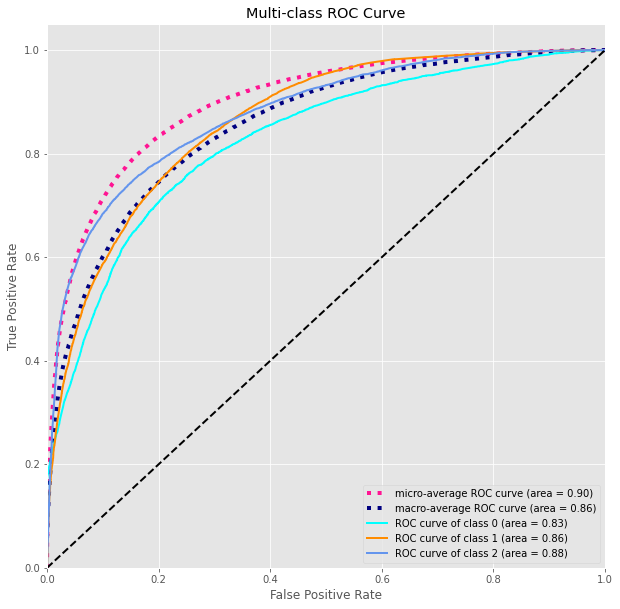

In [288]:
getROCdata(top_classes_gen,one_hot_labels_gen1,predictions_gen_lgbm)

In [289]:
precision, recall, average_precision = Precision(top_classes_gen, one_hot_labels_gen1, predictions_gen_lgbm)

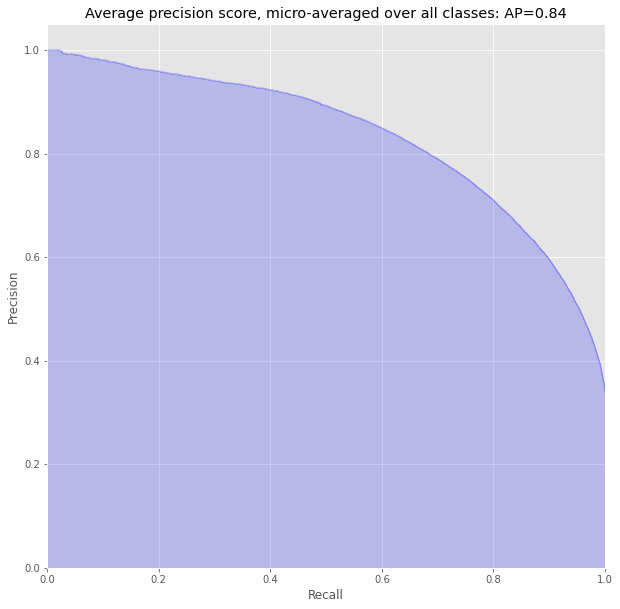

In [290]:
plotPrecision(recall, precision, average_precision)

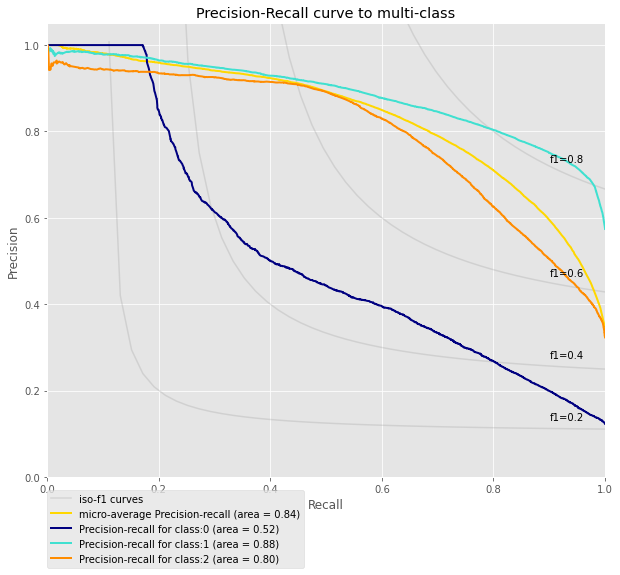

In [291]:
plotPrecisionRecall(top_classes_gen,recall,precision,average_precision)

### **Predicting More Specific Crimes**

In [292]:
importances1 = list(best_model_spec_rf.feature_importances_)
feature_list1 = list(features1.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [293]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

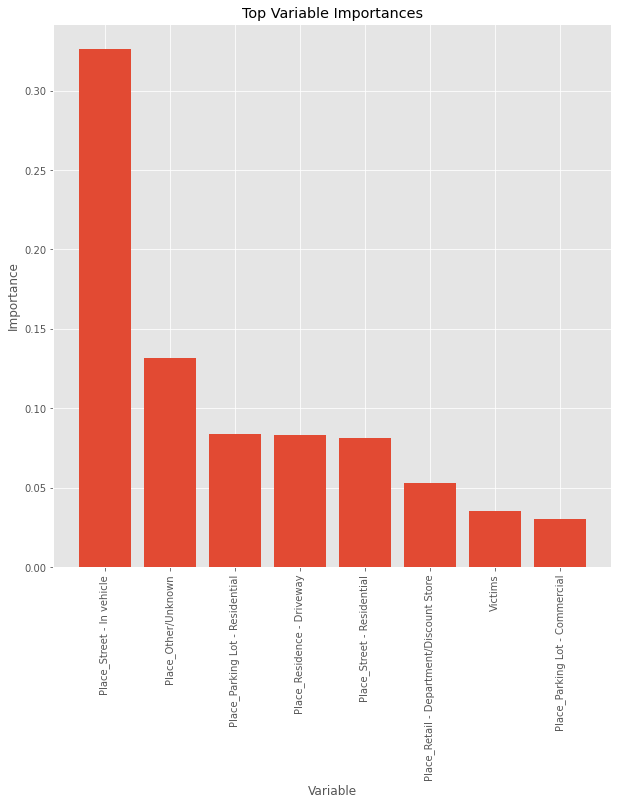

In [294]:
plotImportances(top_importances1, top_features_list1)

Confusion matrix, without normalization


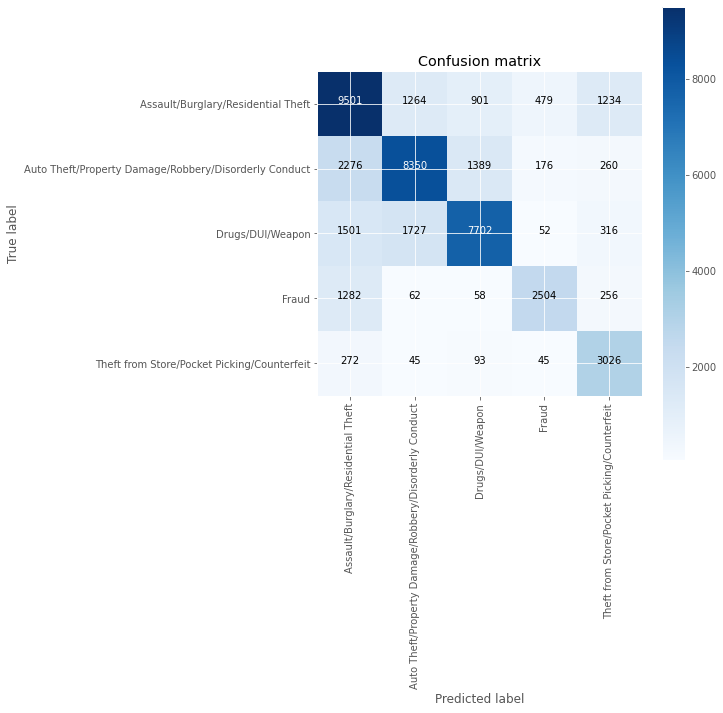

In [338]:
cnf_matrix = confusion_matrix(test_labels_spec1, np.argmax(predictions_spec_rf, axis=1))

# Plot normalized confusion matrix
fig = plt.figure()
fig.set_size_inches(10, 10, forward=True)
#fig.align_labels()

# fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plot_confusion_matrix(cnf_matrix, classes=np.asarray(top_classes_spec), normalize=False,
                      title='Confusion matrix')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


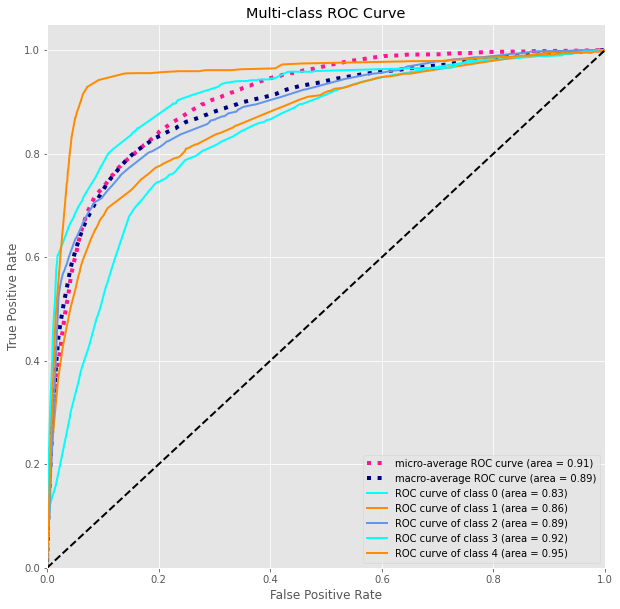

In [339]:
getROCdata(top_classes_spec,one_hot_labels_spec1,predictions_spec_rf)

In [340]:
precision, recall, average_precision = Precision(top_classes_spec, one_hot_labels_spec1, predictions_spec_rf)

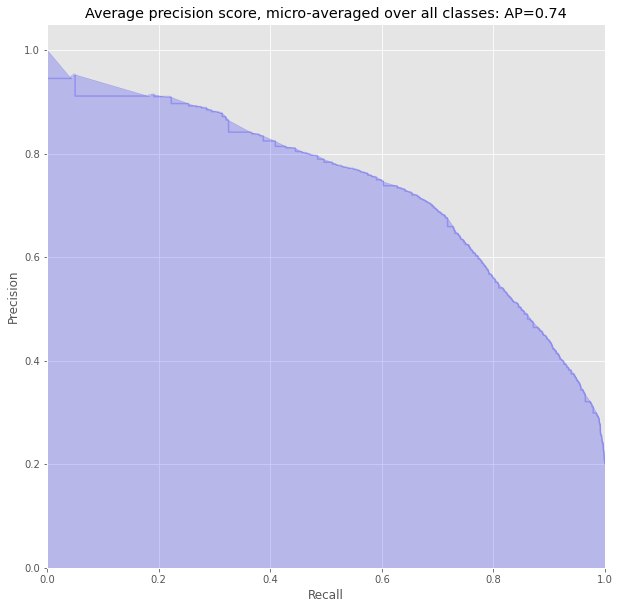

In [341]:
plotPrecision(recall,precision,average_precision)

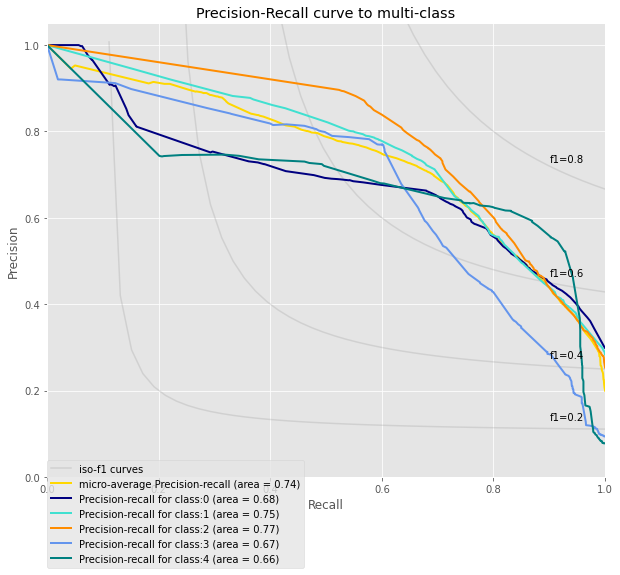

In [342]:
plotPrecisionRecall(top_classes_spec,recall,precision,average_precision)

In [300]:
importances2 = list(best_model_spec_xgb.feature_importances_)
feature_list2 = list(features1.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

In [301]:
top_features_list2, top_importances2 = getImportances(feature_importances2)

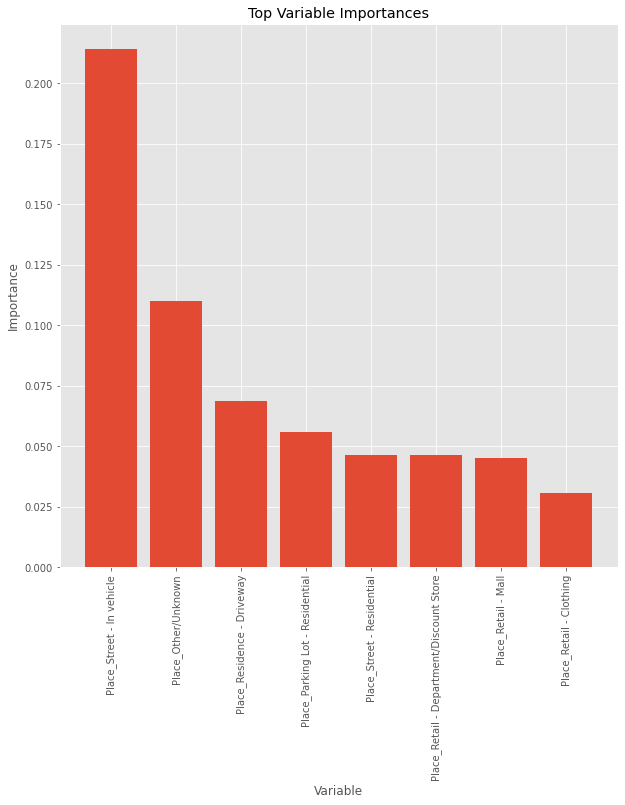

In [302]:
plotImportances(top_importances2, top_features_list2)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


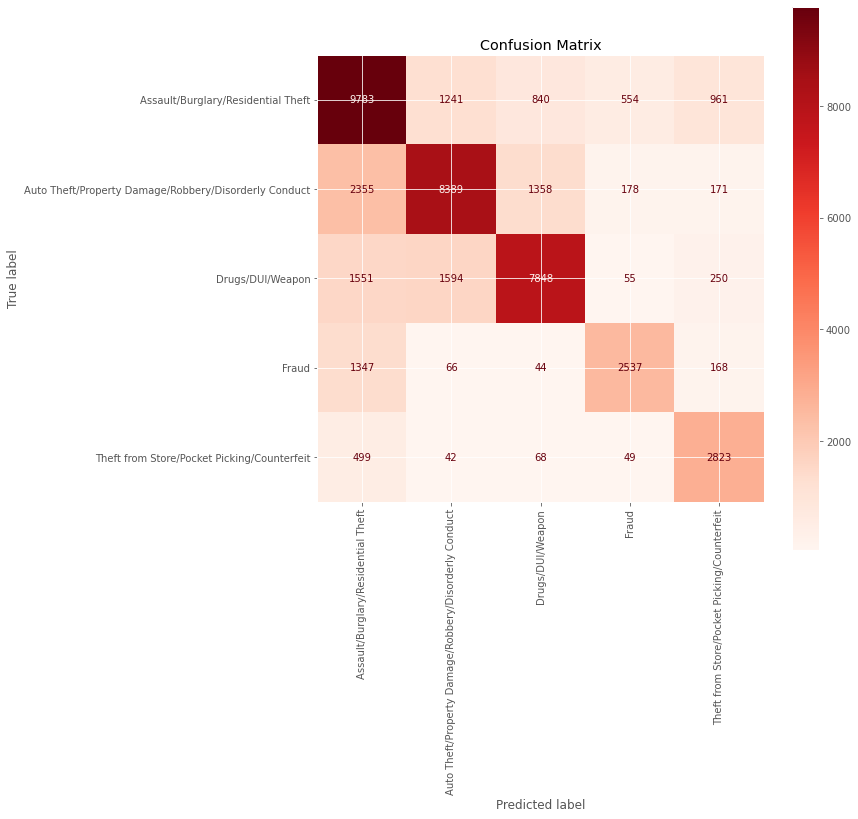

In [303]:
from sklearn.metrics import plot_confusion_matrix as plot_cm

plot_cm(best_model_spec_xgb, test_spec1, test_labels_spec1, display_labels=top_classes_spec, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


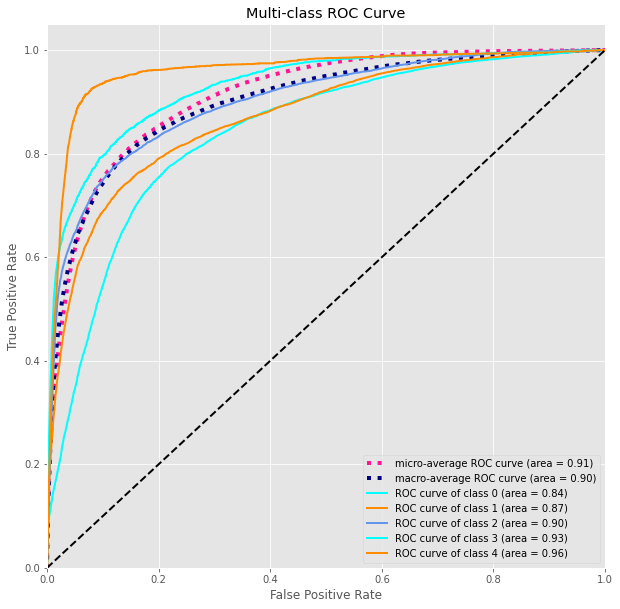

In [304]:
getROCdata(top_classes_spec,one_hot_labels_spec1,predictions_spec_xgb)

In [305]:
precision, recall, average_precision = Precision(top_classes_spec, one_hot_labels_spec1, predictions_spec_lgbm)

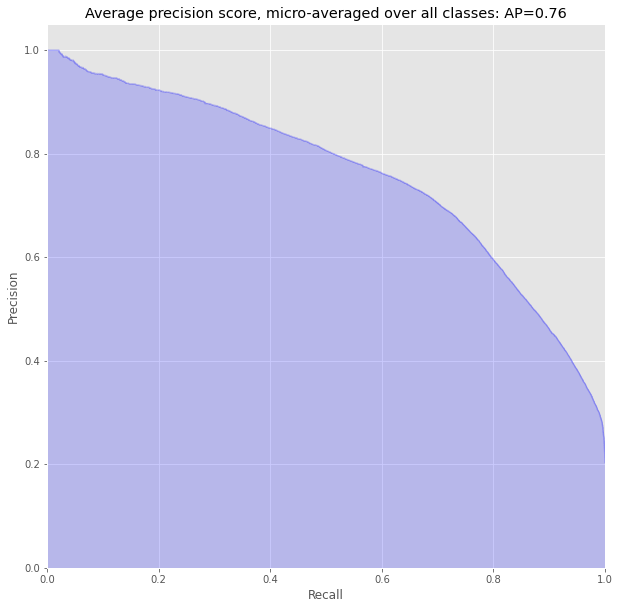

In [306]:
plotPrecision(recall,precision,average_precision)

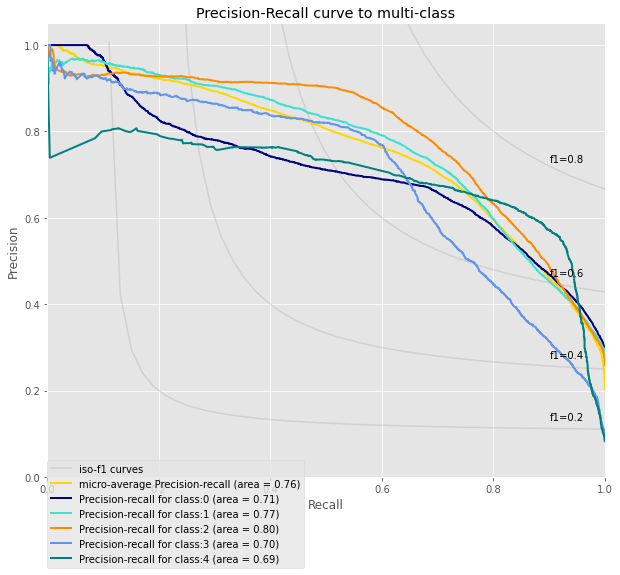

In [307]:
plotPrecisionRecall(top_classes_spec,recall,precision,average_precision)

In [308]:
lgbm_importances = best_model_lgbm.feature_importances_/sum(best_model_lgbm.feature_importances_)
importances3 = list(lgbm_importances)
feature_list3 = list(features1.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

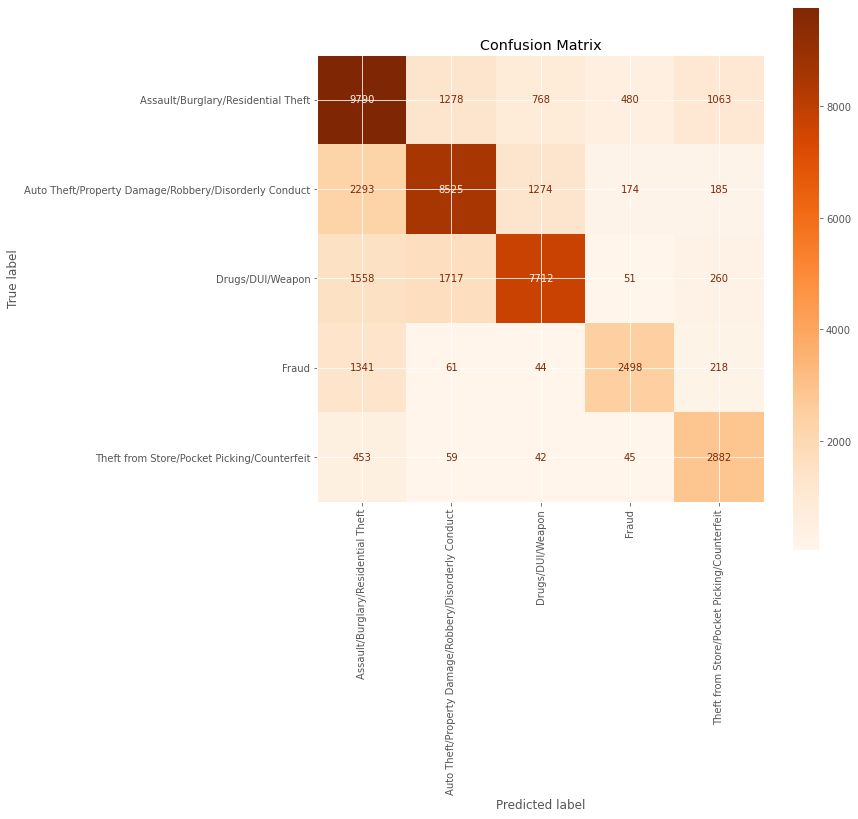

In [311]:
plot_cm(best_model_spec_lgbm, test_spec1, test_labels_spec1, display_labels=top_classes_spec, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(10,10)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


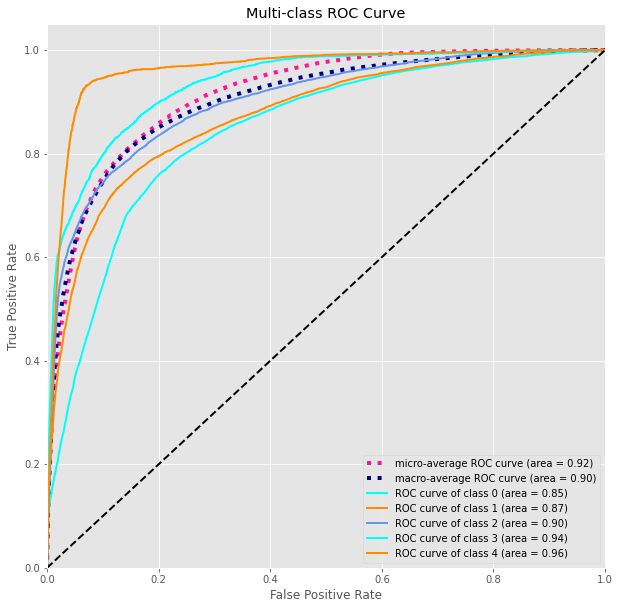

In [313]:
getROCdata(top_classes_spec,one_hot_labels_spec1,predictions_spec_lgbm)

In [314]:
precision, recall, average_precision = Precision(top_classes_spec, one_hot_labels_spec1, predictions_spec_lgbm)

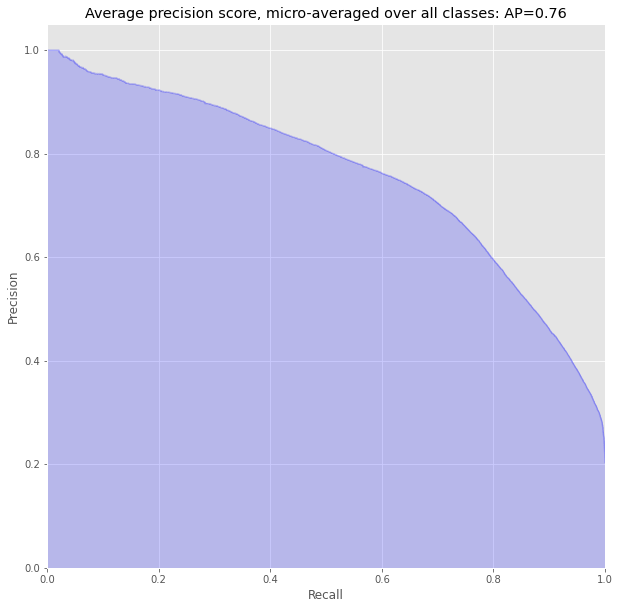

In [315]:
plotPrecision(recall,precision,average_precision)

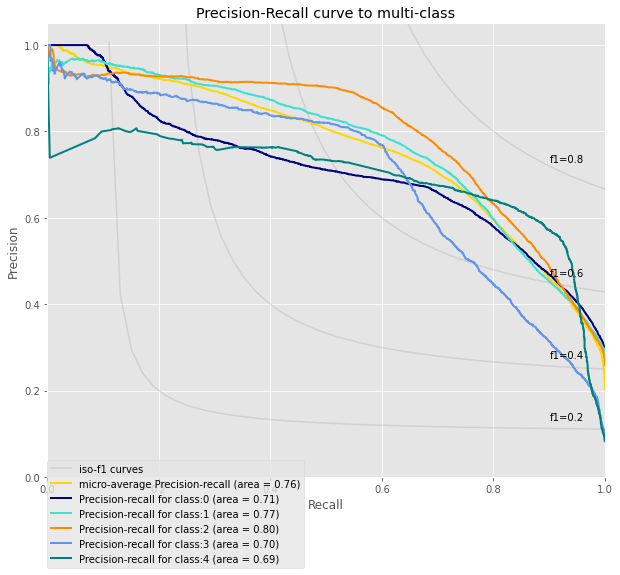

In [316]:
plotPrecisionRecall(top_classes_spec,recall,precision,average_precision)

In [344]:
from sklearn.ensemble import VotingClassifier

estimators = [('rf', ovr_best_model_spec_rf),('xgbm', best_model_spec_xgb),('lgbm',best_model_spec_lgbm)]

ensemble = VotingClassifier(estimators, voting='hard')

ensemble.fit(train_spec1, train_labels_spec1)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


VotingClassifier(estimators=[('rf',
                              OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                                                   max_depth=19,
                                                                                   max_features=None,
                                                                                   max_leaf_nodes=37,
                                                                                   min_samples_split=10,
                                                                                   n_estimators=110,
                                                                                   random_state=4))),
                             ('xgbm',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
          

In [345]:
predictions_final = ensemble.predict(test_spec1)

accuracy_score(test_labels_spec1,predictions_final)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


0.7012575104420272